In [2]:
#imports
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import warnings as w
from sklearn.feature_selection import SequentialFeatureSelector,SelectFromModel
from sklearn.decomposition import PCA
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error
## Regression Models 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

## Load Data

In [3]:
# load data
X_train, X_ivs, y_train, col_names = pickle.load(open("drd2_data.pickle", "rb"))

#creates a dataframe from the numpy ndarrays generated above
df_X_train = pd.DataFrame(X_train, columns=col_names)
df_X_ivs = pd.DataFrame(X_ivs, columns=col_names)
df_y_train = pd.DataFrame(y_train)

#info
print(df_X_train.info())
print(df_X_ivs.info())
print("\n",df_y_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7337 entries, 0 to 7336
Columns: 2132 entries, D00 to FP2088
dtypes: float64(2132)
memory usage: 119.3 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Columns: 2132 entries, D00 to FP2088
dtypes: float64(2132)
memory usage: 13.3 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7337 entries, 0 to 7336
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7337 non-null   float64
dtypes: float64(1)
memory usage: 57.4 KB

 None


In [4]:
df_X_train 

#D0 to D42 43 columns 
# FP44 to FP2088 

,D00,D01,D02,D03,D04,D05,D06,D07,D08,D09,...,FP2079,FP2080,FP2081,FP2082,FP2083,FP2084,FP2085,FP2086,FP2087,FP2088
0,541.280138,541.656,10.0,1.0,8.0,1.0,10.0,40.0,75.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,426.197714,426.582,5.0,1.0,9.0,1.0,4.0,30.0,60.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,348.183778,348.446,4.0,0.0,3.0,0.0,3.0,26.0,50.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1455.763803,1456.831,27.0,19.0,23.0,17.0,16.0,105.0,206.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,387.151368,387.886,4.0,0.0,4.0,0.0,4.0,27.0,50.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7332,467.149047,467.513,6.0,0.0,6.0,0.0,5.0,32.0,56.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7333,240.162649,240.350,2.0,0.0,3.0,0.0,2.0,18.0,38.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7334,510.317874,510.802,4.0,0.0,10.0,0.0,4.0,37.0,79.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7335,393.187483,393.556,4.0,2.0,5.0,1.0,5.0,28.0,55.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Exploratory Data Analysis (EDA)


In [5]:
#check for duplicates
print("Number of Duplicates train set:",df_X_train.duplicated().sum())

#check for missing values
print("Missing Values train set:",df_X_train.isnull().sum().sum())




Number of Duplicates train set: 321
Missing Values train set: 0


In [6]:
#statistical info of the data
df_X_train.describe()

,D00,D01,D02,D03,D04,D05,D06,D07,D08,D09,...,FP2079,FP2080,FP2081,FP2082,FP2083,FP2084,FP2085,FP2086,FP2087,FP2088
count,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,...,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000,7337.000000
mean,430.518010,431.037078,5.430285,1.206897,6.527327,1.128799,4.678070,30.497615,59.165190,6.594930,...,0.396211,0.036800,0.031075,0.088456,0.027668,0.011040,0.018264,0.038026,0.094725,0.036800
std,181.613020,181.757699,4.160569,2.527815,5.983082,2.218665,2.789156,12.882724,25.749585,4.403703,...,0.489143,0.188283,0.173533,0.283976,0.164031,0.104497,0.133912,0.191273,0.292855,0.188283
min,135.068414,135.166000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,19.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,357.124405,357.429000,4.000000,0.000000,4.000000,0.000000,3.000000,25.000000,49.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,419.107040,419.500000,5.000000,1.000000,6.000000,1.000000,4.000000,30.000000,57.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,472.228141,472.888000,6.000000,1.000000,8.000000,1.000000,6.000000,33.000000,65.000000,8.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3768.848446,3771.262000,92.000000,47.000000,137.000000,42.000000,58.000000,266.000000,527.000000,93.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df_y_train.describe()

,0
count,7337.000000
mean,0.388388
std,0.276656
min,0.000000
25%,0.169187
50%,0.382177
75%,0.581929
max,1.000000


Removing the duplicates in EDA to divide the data into the D columns and the FP columns, without duplicates.

In [8]:
def remove_duplicates(d1, d2):
    #cant remove directly the duplicates of the training set because the data is already divided
    #joining the x_train_D and the y_train dataframe to remove the duplicates in a secure way
    df = pd.concat([d1, d2], axis = 1)
    df.rename(columns = { 0 :'Target'}, inplace=True) # renaming the y_train column
    print("Total duplicates:", df.duplicated().sum())

    df.drop_duplicates(inplace=True) 

    print("Total duplicates after removing:", df.duplicated().sum())
    return df

In [9]:
#separating the df without duplicates into x_train and y_train again
df = remove_duplicates(df_y_train,df_X_train)
df_y_train = df['Target']
df_X_train = df.drop(columns= ['Target'])

Total duplicates: 29
Total duplicates after removing: 0


In [10]:
# first 43 columns D column name until the first FP column name
df_X_train_D = df_X_train.iloc[:, :43]

# from the first FP column till the end
df_X_train_FP = df_X_train.iloc[:, 43:]

# first 43 columns D column name until the first FP column name
df_X_ivs_D = df_X_ivs.iloc[:, :43]

# from the first FP column till the end
df_X_ivs_FP = df_X_ivs.iloc[:, 43:]

print(df_X_train_D.info())
print(df_X_ivs_D.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7308 entries, 0 to 7336
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   D00     7308 non-null   float64
 1   D01     7308 non-null   float64
 2   D02     7308 non-null   float64
 3   D03     7308 non-null   float64
 4   D04     7308 non-null   float64
 5   D05     7308 non-null   float64
 6   D06     7308 non-null   float64
 7   D07     7308 non-null   float64
 8   D08     7308 non-null   float64
 9   D09     7308 non-null   float64
 10  D10     7308 non-null   float64
 11  D11     7308 non-null   float64
 12  D12     7308 non-null   float64
 13  D13     7308 non-null   float64
 14  D14     7308 non-null   float64
 15  D15     7308 non-null   float64
 16  D16     7308 non-null   float64
 17  D17     7308 non-null   float64
 18  D18     7308 non-null   float64
 19  D19     7308 non-null   float64
 20  D20     7308 non-null   float64
 21  D21     7308 non-null   float64
 22  

### Histograms


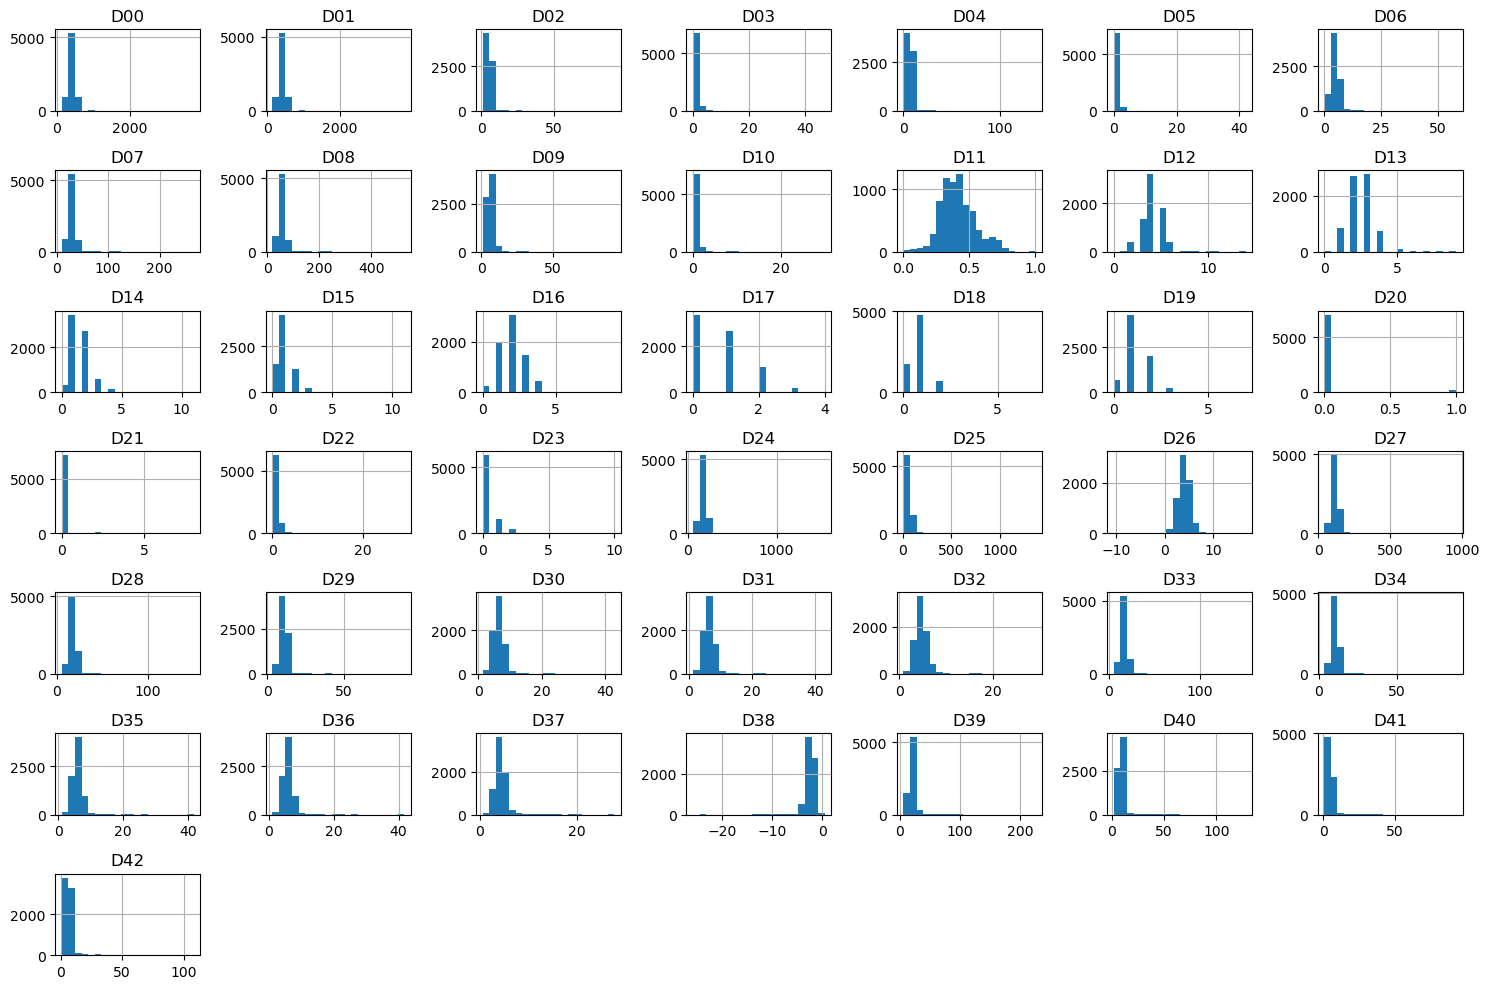

In [11]:
df_X_train_D.hist(bins=20, figsize=(15, 10))
plt.tight_layout() 
plt.show()

Observations:
* We can observe that the columns 'D12' to 'D22' might be categorical

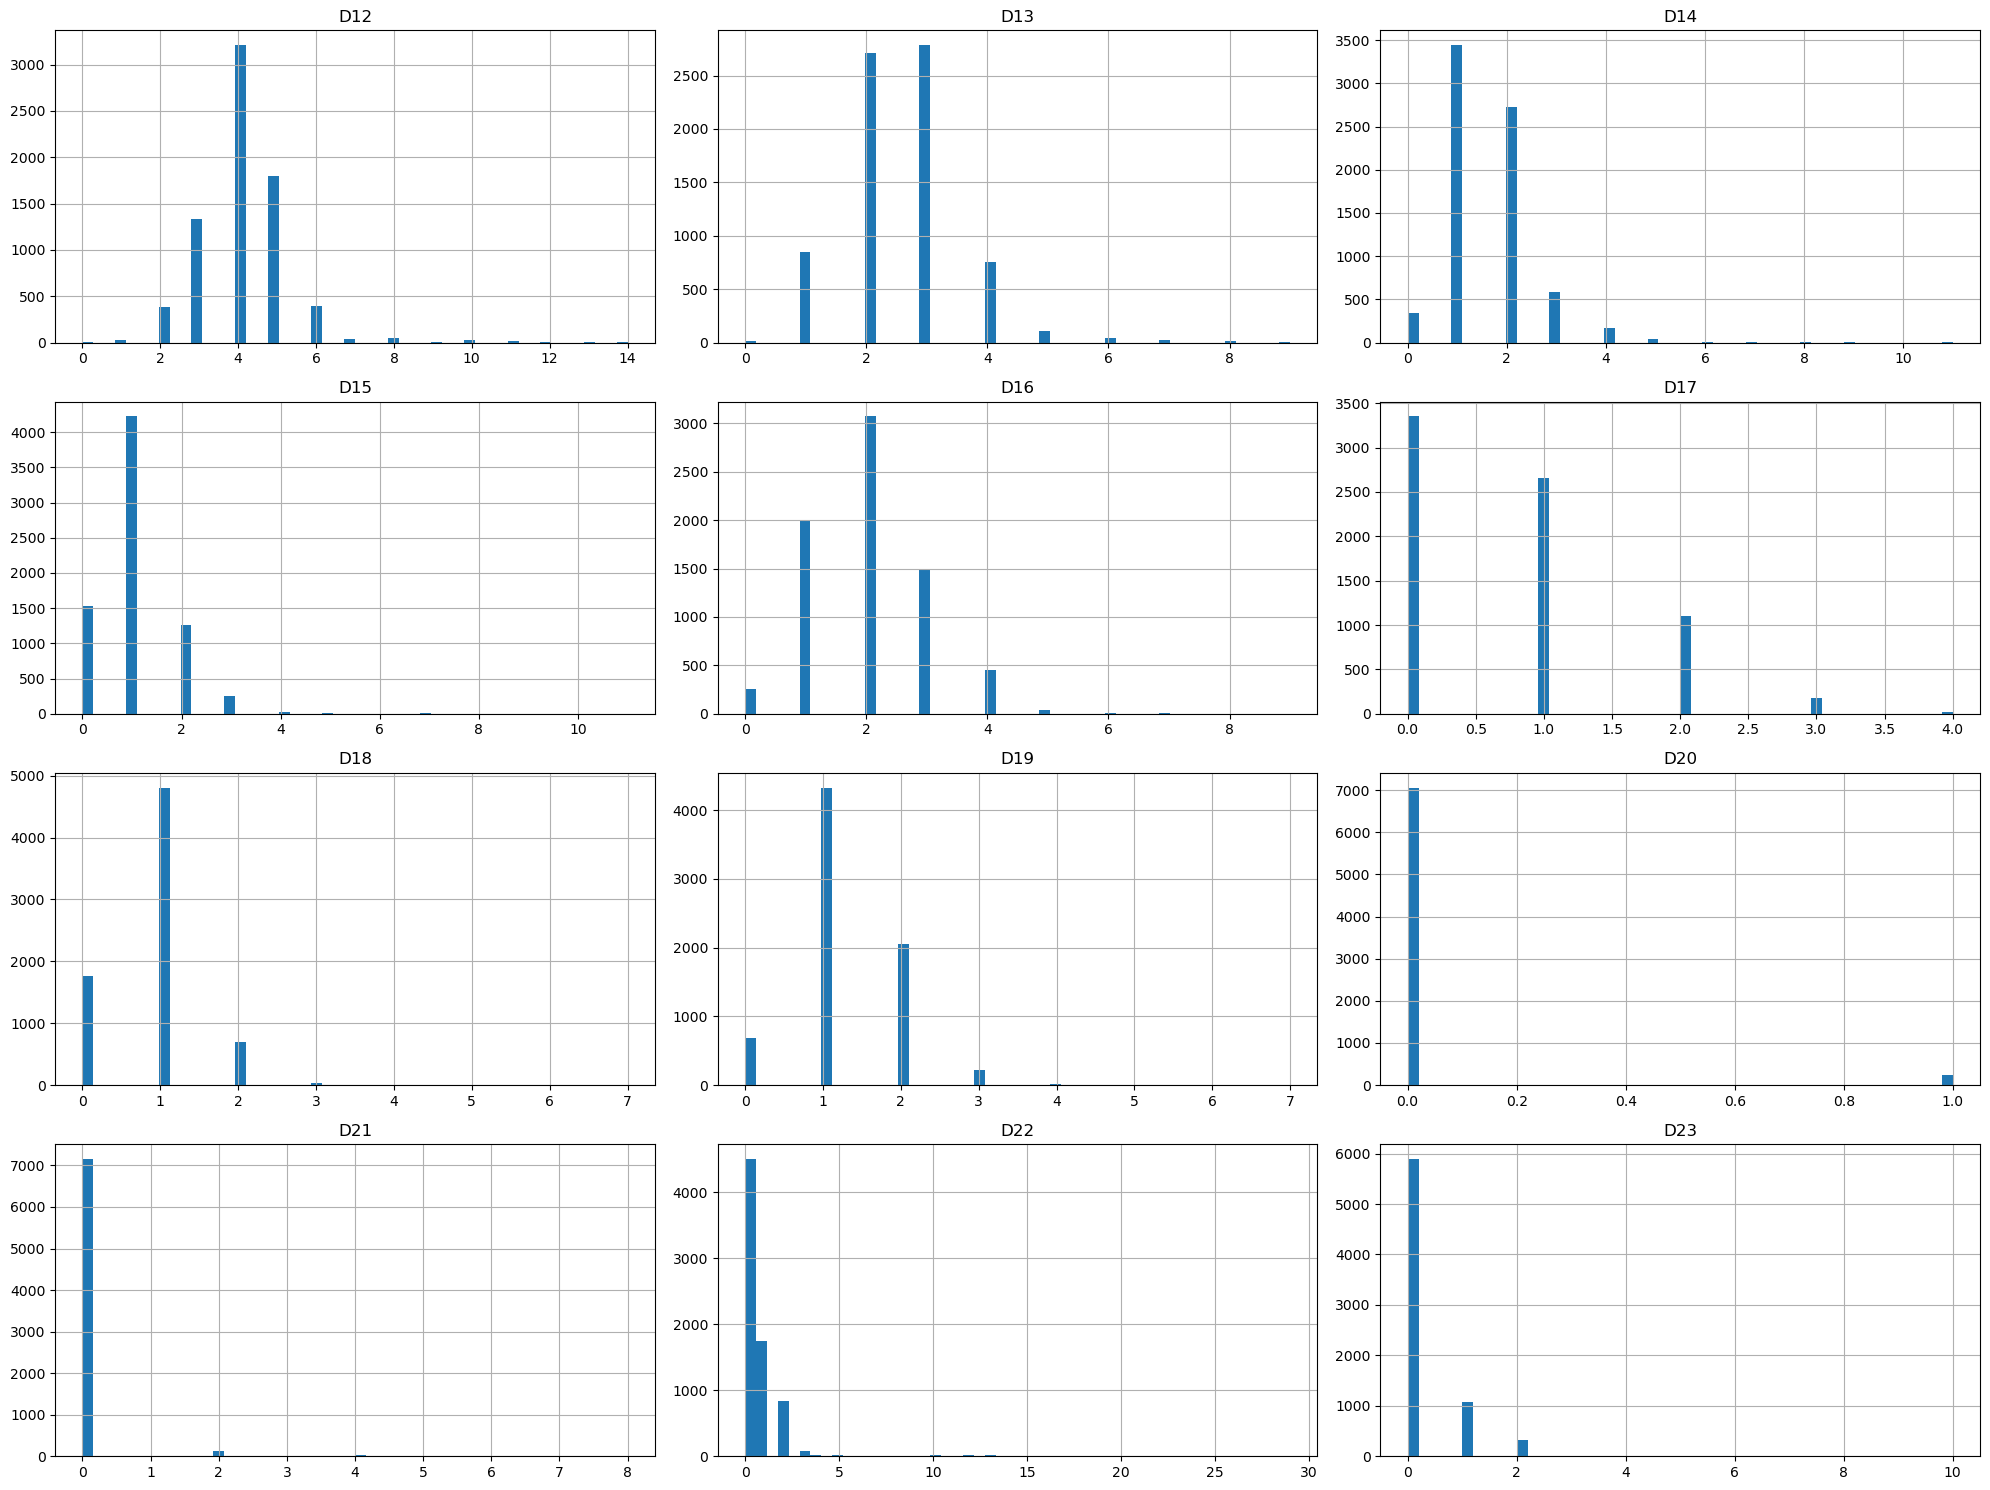

In [12]:
#select columns to plot
columns_to_plot = ['D12', 'D13','D14','D15','D16','D17','D18','D19','D20','D21','D22','D23']

fig, ax = plt.subplots(figsize=(20, 15))
#ignore warnings
w.filterwarnings('ignore')
df_X_train_D[columns_to_plot].hist(ax=ax, bins=50)
ax.set_title('Histogram of D12 to  D23 Features')
plt.tight_layout() 
plt.show()


After a closer look we can definitely say that all columns except for column 'D22' are numerical and should be categorical.

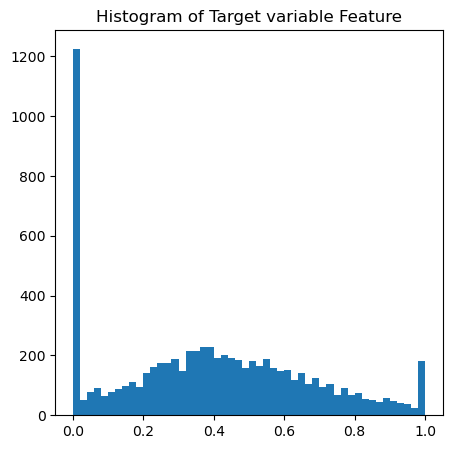

In [13]:
#histogram of the target variable

hist, bin_edges = np.histogram(df_y_train, bins=50)
plt.figure(figsize=(5,5))
plt.hist(df_y_train, bins=50)
plt.title('Histogram of Target variable Feature')
plt.show()

### Check for Outliers
Identify outliers and anomalies in the data.

In [14]:
#calculate the z-score for each point of the training set
z_scores = np.abs((df_X_train_D - df_X_train_D.mean()) / df_X_train_D.std())

#define a threshold value
threshold = 3 # its considered an outiler when the value of the point is 3 * mean of the training set, so the threshold is 3

#Identify the outliers
outliers = df_X_train_D[z_scores > threshold]

#Count the number of outliers
num_outliers = outliers.count().sum()


print(f"outliers \n {outliers} \n") # non null values represent the outliers
print(f"outliers count \n {num_outliers} \n")

outliers 
               D00       D01   D02   D03  D04   D05   D06    D07    D08   D09  \
0             NaN       NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN   NaN   
1             NaN       NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN   NaN   
2             NaN       NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN   NaN   
3     1455.763803  1456.831  27.0  19.0  NaN  17.0  16.0  105.0  206.0  28.0   
4             NaN       NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN   NaN   
...           ...       ...   ...   ...  ...   ...   ...    ...    ...   ...   
7332          NaN       NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN   NaN   
7333          NaN       NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN   NaN   
7334          NaN       NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN   NaN   
7335          NaN       NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN   NaN   
7336          NaN       NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN   NaN   

      ...        D33        

## Data processing


In [15]:
# Print all the rows
def print_full (dataset, n_rows):
        # set display option to show all rows
        pd.set_option('display.max_rows', None)
        # set display option to show all columns
        pd.set_option('display.max_columns', None)
        pd.set_option('display.width', 1000)

        print (f"dataset \n {dataset.head(n_rows)}")
        
        # reset display option to default
        pd.reset_option('display.max_rows')
        pd.reset_option('display.max_columns')
        pd.reset_option('display.width')


In [16]:
#create dummies to change the columns from numeric to categorical, adding a column for each value
def dummies_for_columns(dataframe, columns_to_change):

    for col in columns_to_change:
        dataframe = pd.concat([dataframe,pd.get_dummies(dataframe[col], prefix= col)], axis = 1)
        dataframe.drop(columns = [col], inplace= True)

    return dataframe

In [17]:
# numeric columns to change to categorical 
columns_to_dummies = ['D12','D13','D14','D15','D16','D17','D18','D19','D20','D21','D23']

# i have to concat the train and ivs dataframes to ensure the same columns 
df_X_D_combined = pd.concat([df_X_train_D, df_X_ivs_D], axis = 0)#axis = 0 to concatenate vertically(along rows)

df_X_D_combined = dummies_for_columns(df_X_D_combined, columns_to_dummies)

print(df_X_D_combined.info())

# i have to concat the train and ivs dataframes to ensure the same columns 
df_X_combined = pd.concat([df_X_train, df_X_ivs], axis = 0)#axis = 0 to concatenate vertically(along rows)

df_X_combined = dummies_for_columns(df_X_combined, columns_to_dummies)

print(df_X_combined.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8124 entries, 0 to 815
Columns: 121 entries, D00 to D23_10.0
dtypes: float64(32), uint8(89)
memory usage: 2.7 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8124 entries, 0 to 815
Columns: 2210 entries, D00 to D23_10.0
dtypes: float64(2121), uint8(89)
memory usage: 132.2 MB
None


In [18]:
#separating the combined x_train and x_ivs dataframe into 2 different dataframes again
df_X_train_D = df_X_D_combined.iloc[:len(df_X_train_D),:]# first 7308 rows
df_X_ivs_D = df_X_D_combined.iloc[len(df_X_train_D):,:]# last 816 rows

print(df_X_train_D.info())
print(df_X_ivs_D.info())

#separating the combined x_train and x_ivs dataframe into 2 different dataframes again
df_X_train = df_X_combined.iloc[:len(df_X_train),:]
df_X_ivs = df_X_combined.iloc[len(df_X_train):,:]

print(df_X_train.info())
print(df_X_ivs.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7308 entries, 0 to 7336
Columns: 121 entries, D00 to D23_10.0
dtypes: float64(32), uint8(89)
memory usage: 2.5 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 815
Columns: 121 entries, D00 to D23_10.0
dtypes: float64(32), uint8(89)
memory usage: 281.3 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7308 entries, 0 to 7336
Columns: 2210 entries, D00 to D23_10.0
dtypes: float64(2121), uint8(89)
memory usage: 118.9 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 815
Columns: 2210 entries, D00 to D23_10.0
dtypes: float64(2121), uint8(89)
memory usage: 13.3 MB
None


### Feature Selection


#### Looking for correlations
Should be in the EDA section but we need the data cleaned which means it needs to be after the data processing section in this case.

In [19]:
#Draws a correlation matrix
def draw_correlation_matrix (corr,cols):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,len(cols),1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(cols, fontsize=4)
    ax.set_yticklabels(cols, fontsize=4)
    plt.show()


# Return correlation matrix
def corr_target(d_X_train,d_y_train,n_corr):
    # joining the x_train dataframe with the y_train dataframe
    df = pd.concat([d_y_train, d_X_train], axis = 1)
    df.rename(columns = { 0 :'Target'}, inplace=True) # renaming the y_train column

    #creates a matrix of correlations
    corr_matrix = df.corr() 
    #how much each attribute correlates with the target variable value, the lower the value the least relevant the feature is
    print("\nCorrelations Matrix\n")
    df_corr = corr_matrix['Target'].sort_values(ascending=False)
    print_full(df_corr,n_corr)
    return corr_matrix

In [20]:
# correlates each column with target (y)
corr_matrix = corr_target (df_X_train,df_y_train,50)


Correlations Matrix

dataset 
 Target    1.000000
FP1011    0.290063
FP0953    0.256689
FP0521    0.247162
FP1295    0.237157
FP0310    0.236406
FP1484    0.219773
FP0683    0.215643
FP1532    0.210883
FP0427    0.205320
FP0843    0.201582
FP1242    0.195876
D32       0.188656
D30       0.186793
D31       0.186793
FP0503    0.185768
FP1665    0.179645
FP0033    0.179407
FP1497    0.178894
D29       0.177845
D35       0.176852
D36       0.176852
D37       0.176542
FP1701    0.175563
D34       0.171417
FP1452    0.170094
FP1221    0.168713
FP0577    0.167194
D27       0.166784
FP1496    0.165942
D08       0.164762
FP1123    0.163912
D28       0.162416
FP0203    0.162370
FP0580    0.161414
FP0409    0.161263
D24       0.160397
FP0939    0.159281
D01       0.159275
D00       0.159241
FP0451    0.158694
D33       0.158435
D07       0.156780
FP0395    0.153252
FP1912    0.152455
FP0009    0.152317
D04       0.152123
FP1879    0.151005
FP1821    0.150456
FP1125    0.149959
Name: Target, dtyp

In [21]:
#How much each attribute correlates with each other: All D columns
corr_matrix = df_X_train_D.corr()

# Get the top x pairs with the highest correlation coefficients (The first x pair is the same column)
top_pairs = (corr_matrix.unstack()
             .sort_values(ascending=False)
             .reset_index()
             .rename(columns={0: 'correlation'})
             .query('level_0 != level_1')
             .iloc[:50])

print_full(top_pairs,50)

dataset 
       level_0   level_1  correlation
1    D12_12.0   D18_6.0     1.000000
3    D12_14.0   D13_9.0     1.000000
5    D12_13.0   D21_8.0     1.000000
6    D12_13.0   D14_9.0     1.000000
8    D12_12.0   D19_6.0     1.000000
9    D12_12.0   D16_9.0     1.000000
22    D14_7.0   D15_7.0     1.000000
24    D14_6.0   D15_6.0     1.000000
32    D13_9.0  D12_14.0     1.000000
40        D30       D31     1.000000
57        D31       D30     1.000000
69        D36       D35     1.000000
70        D35       D36     1.000000
76    D14_8.0   D15_8.0     1.000000
77    D14_9.0  D12_13.0     1.000000
79    D19_6.0   D16_9.0     1.000000
80    D19_6.0  D12_12.0     1.000000
87    D18_7.0   D19_7.0     1.000000
89    D18_6.0   D19_6.0     1.000000
91    D18_6.0   D16_9.0     1.000000
92    D18_6.0  D12_12.0     1.000000
94    D19_6.0   D18_6.0     1.000000
95    D19_7.0   D18_7.0     1.000000
106   D21_8.0   D14_9.0     1.000000
107   D21_8.0  D12_13.0     1.000000
118   D15_8.0   D14_8.0     

Observations: 
* FP columns have higher correlation with target (y).
* D columns are the ones who have a higher correlation between themselves

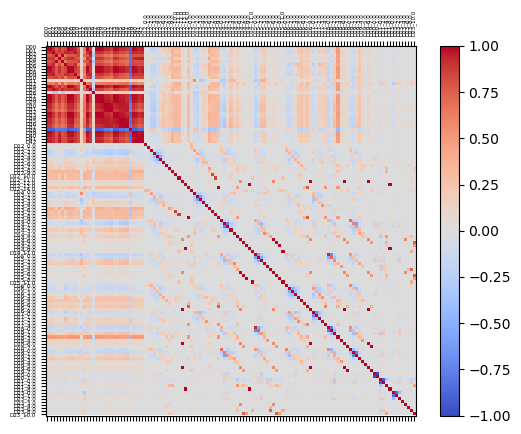

In [22]:
# Draws a correlation matrix between D pairs (43 columns)

#How much each attribute correlates with each other
corr_matrix_Ds = df_X_train_D.corr()
draw_correlation_matrix (corr_matrix_Ds, df_X_train_D.columns)


Observations: 
* The red block in the top left corner is the data without the categorization
* After the categorization we have a sparse matrix, but it has a high correlation between the categorical data represented by the red dots.

In [23]:
#How much each attribute correlates with each other: All FP columns
corr_matrix = df_X_train_FP.corr()

# Get the top x pairs with the highest correlation coefficients (The first x pair is the same column)
top_pairs = (corr_matrix.unstack()
             .sort_values(ascending=False)
             .reset_index()
             .rename(columns={0: 'correlation'})
             .query('level_0 != level_1')
             .iloc[:50])

print_full(top_pairs,50)

dataset 
      level_0 level_1  correlation
2089  FP0683  FP1295     0.890841
2090  FP1295  FP0683     0.890841
2091  FP1205  FP2079     0.876421
2092  FP2079  FP1205     0.876421
2093  FP2045  FP0253     0.858772
2094  FP0253  FP2045     0.858772
2095  FP1930  FP0907     0.857022
2096  FP0907  FP1930     0.857022
2097  FP0507  FP1043     0.854615
2098  FP1043  FP0507     0.854615
2099  FP2022  FP1637     0.847474
2100  FP1637  FP2022     0.847474
2101  FP0577  FP0399     0.833772
2102  FP0399  FP0577     0.833772
2103  FP0895  FP0725     0.826350
2104  FP0725  FP0895     0.826350
2105  FP0096  FP2029     0.823395
2106  FP2029  FP0096     0.823395
2107  FP0725  FP0474     0.817304
2108  FP0474  FP0725     0.817304
2109  FP0680  FP1229     0.815256
2110  FP1229  FP0680     0.815256
2111  FP0920  FP0650     0.810731
2112  FP0650  FP0920     0.810731
2113  FP0650  FP0680     0.808578
2114  FP0680  FP0650     0.808578
2115  FP0540  FP0895     0.806628
2116  FP0895  FP0540     0.806628
2117

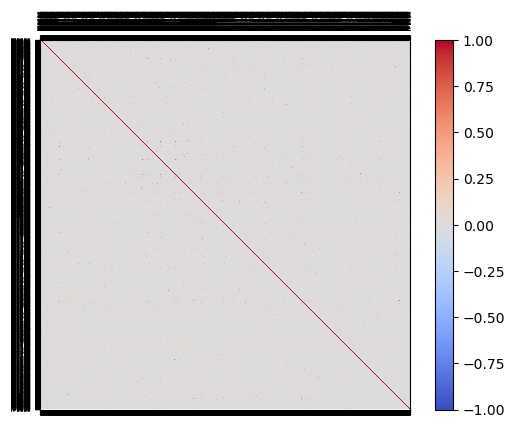

In [24]:
#Draws a correlation matrix between FP pairs

#How much each attribute correlates with each other
corr_matrix_FPs = df_X_train_FP.corr()
draw_correlation_matrix (corr_matrix_FPs, df_X_train_FP.columns)

Observations: 
* some FP columns are more correlated with y than D columns 
* FP columns are sparsed but have some correlation (sparse) with themselves

High correlation between pairs of variables does not necessarily imply that the correlation is linear. Correlation measures the strength of a linear relationship between two variables, but it does not capture non-linear relationships 1. Therefore, it is not appropriate to assume that the correlation is linear based solely on the presence of high correlations between pairs of variables.

To understand if the correlation between two variables is linear, we can plot a scatter plot of the two variables and visually inspect the relationship between them. If the relationship appears to be linear, then the correlation coefficient can be used to quantify the strength of the linear relationship. If the relationship appears to be non-linear, then other techniques such as polynomial regression or non-linear regression may be more appropriate.

#### Scaling

In [25]:
# Scale a dataset (training and testing). Return both scaled
def scaling (scaler, X_train, X_test, verbose):
    
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled  = scaler.transform(X_test)

    # Convert the scaled feature matrix back to a Pandas DataFrame
    X_train_c = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_c = pd.DataFrame(X_test_scaled, columns=X_test.columns)

    if verbose:
        print ("Scaler")
        print ( f"X_train_c shape \n {X_train_c.shape} \n")
        print ( f"X_train_c.describe() \n {X_train_c.describe()} \n")

        # show first 5 column
        print (f"X_train_c.head() \n {X_train_c.head()}")

        print ( f"X_test_c shape \n {X_test_c.shape} \n")
        print ( f"X_test_c.describe() \n {X_test_c.describe()} \n")

        # show first 5 column
        print (f"X_test_c.head() \n {X_test_c.head()}")

    return X_train_c, X_test_c


In [26]:
#scaling before feature selection

df_X_train_scaled,df_X_ivs_scaled= scaling(MinMaxScaler(), df_X_train, df_X_ivs, False)

df_X_train_D_scaled,df_X_ivs_D_scaled= scaling(MinMaxScaler(), df_X_train_D, df_X_ivs_D, False)


In [27]:
# feature selection with SelectKBest
# return X_train, X_test
def select_features(X_train, y_train, X_test, k_param, n_comp, verbose):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k=k_param)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    
    # Get the names of the selected features
    mask = fs.get_support()
    feature_names = X_train.columns
    selected_feature_names = feature_names[mask]
    
    X_train_fs = pd.DataFrame (X_train_fs)
    X_test_fs = pd.DataFrame (X_test_fs)

    X_train_fs.columns = selected_feature_names
    X_test_fs.columns = selected_feature_names
    
    if verbose:
        print(f"select_features X_train_fs.columns: {X_train_fs.columns}")

    feature_results =[]
    for i, column in enumerate(X_train_fs.columns):
        if verbose:
            print (f"Feature i: {i} column: {column} fs.scores_[i] {fs.scores_[i]}")
        feature_results.append((i,
                    column,
                    fs.scores_[i],
                    ))

    #Sort List
    feature_results_sorted = sorted(feature_results, key=lambda x: x[2], reverse=True) #score

    final_feature_results = pd.DataFrame(feature_results_sorted)
    final_feature_results.columns = ["i", "column", "score"]

    print_full(final_feature_results,500) # "500 best features

    # plot the scores
    pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
    pyplot.show()
        
    return X_train_fs, X_test_fs #, fs

dataset 
         i   column       score
0    1043   FP1011  671.172085
1     985   FP0953  515.343136
2     553   FP0521  475.357506
3    1327   FP1295  435.402567
4     342   FP0310  432.488149
5    1516   FP1484  370.790403
6     715   FP0683  356.312698
7    1564   FP1532  340.032090
8     459   FP0427  321.548274
9     875   FP0843  309.457501
10   1274   FP1242  291.495158
11     21      D32  269.625021
12     19      D30  264.135381
13     20      D31  264.135381
14    535   FP0503  261.139816
15   1697   FP1665  243.643730
16     65   FP0033  242.977147
17   1529   FP1497  241.545708
18     18      D29  238.626918
19     24      D35  235.885118
20     25      D36  235.885118
21     26      D37  235.031181
22   1733   FP1701  232.348702
23     23      D34  221.175803
24   1484   FP1452  217.674500
25   1253   FP1221  214.052252
26    609   FP0577  210.103233
27   2181  D18_0.0  209.519630
28     16      D27  209.044631
29   1528   FP1496  206.879282
30      8      D08  203.86652

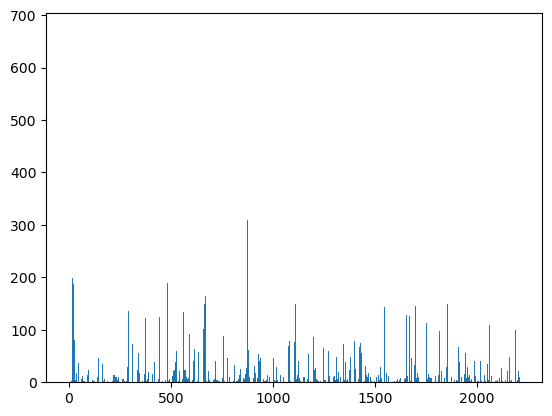

In [28]:
VERBOSE = True
NO_VERBOSE = False

#1. Feature selection a. Using corelation i) Correlation statistic (select_features) 01
# feature selection study values for all columns
df_X_train_scaled_fs, df_X_ivs_scaled_fs = select_features(df_X_train_scaled, df_y_train, df_X_ivs_scaled,'all', 0 , NO_VERBOSE)


dataset 
        i    column       score
0     21       D32  269.625021
1     19       D30  264.135381
2     20       D31  264.135381
3     18       D29  238.626918
4     24       D35  235.885118
5     25       D36  235.885118
6     26       D37  235.031181
7     23       D34  221.175803
8     92   D18_0.0  209.519630
9     16       D27  209.044631
10     8       D08  203.866525
11    17       D28  197.946187
12    13       D24  192.927481
13     1       D01  190.166644
14     0       D00  190.083552
15    22       D33  188.114878
16     7       D07  184.105726
17    68   D15_0.0  179.778047
18     4       D04  173.075502
19    29       D40  168.064867
20    28       D39  165.958013
21    57   D14_0.0  146.120265
22    31       D42  144.531557
23     2       D02  124.660561
24    30       D41  123.406090
25     6       D06  116.164688
26     9       D09  113.997083
27    99   D19_0.0  100.317716
28    93   D18_1.0   81.008275
29    27       D38   80.532117
30    14       D25   78.93405

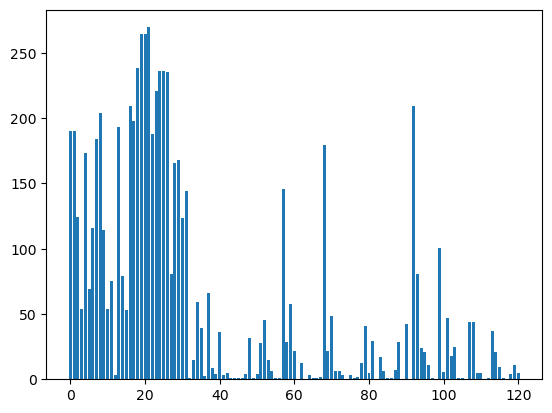

In [29]:
#for the D columns only
df_X_train_D_scaled_fs, df_X_ivs_D_scaled_fs = select_features(df_X_train_D_scaled, df_y_train, df_X_ivs_D_scaled,'all', 0 , NO_VERBOSE)

dataset 
         i  column       score
0    1011  FP1011  671.172085
1     953  FP0953  515.343136
2     521  FP0521  475.357506
3    1295  FP1295  435.402567
4     310  FP0310  432.488149
5    1484  FP1484  370.790403
6     683  FP0683  356.312698
7    1532  FP1532  340.032090
8     427  FP0427  321.548274
9     843  FP0843  309.457501
10   1242  FP1242  291.495158
11    503  FP0503  261.139816
12   1665  FP1665  243.643730
13     33  FP0033  242.977147
14   1497  FP1497  241.545708
15   1701  FP1701  232.348702
16   1452  FP1452  217.674500
17   1221  FP1221  214.052252
18    577  FP0577  210.103233
19   1496  FP1496  206.879282
20   1123  FP1123  201.710884
21    203  FP0203  197.830438
22    580  FP0580  195.445668
23    409  FP0409  195.072072
24    939  FP0939  190.181075
25    451  FP0451  188.745635
26    395  FP0395  175.715968
27   1912  FP1912  173.849487
28      9  FP0009  173.529344
29   1879  FP1879  170.483269
30   1821  FP1821  169.217215
31   1125  FP1125  168.075340


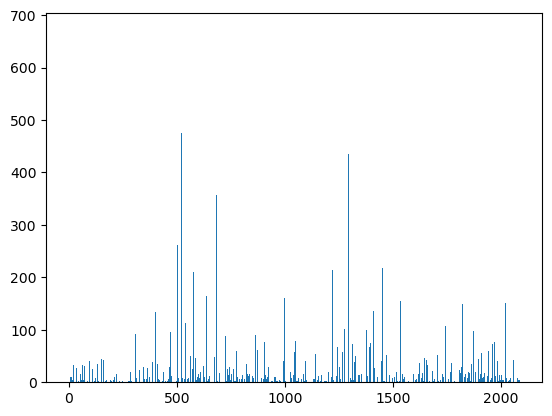

In [30]:
#for the FP columns only
df_X_train_FP_fs, df_X_ivs_FP_fs = select_features(df_X_train_FP, df_y_train, df_X_ivs_FP,'all', 0 , NO_VERBOSE)

Observations:
* The graphs are merely used to define a threshold, that will be used to determine which are the best features with the importance value above the threshold value.

In [31]:
# PCA for reducing dimension
# Return X_train and X_test (dataframes):
def pca_red_d (X_train, y_train, X_test, k_features, n_comp, verbose):

    pca = PCA(n_components=n_comp)
    pca.fit(X_train)
    tve=0
    if verbose:
        for i, ve in enumerate(pca.explained_variance_ratio_):
            tve+=ve
            print("PC%d - Variance explained: %7.4f - Total Variance: %7.4f" % (i, ve, tve) )
        print()
        print("Actual Eigenvalues:", pca.singular_values_)
        for i,comp in enumerate(pca.components_):
            print("PC",i, "-->", comp)
            
    nX_train=pca.transform(X_train)
    nX_test=pca.transform(X_test)
    
    # create a pandas DataFrame from the nX_train numpy array
    df_train = pd.DataFrame(nX_train, columns=[f"PC{i}" for i in range(nX_train.shape[1])])

    # create a pandas DataFrame from the nX_test numpy array
    df_test = pd.DataFrame(nX_test, columns=[f"PC{i}" for i in range(nX_test.shape[1])])
    
    #if verbose:
    #    print(f"PCA df_train.shape: {df_train.shape}")
    #    print(f"PCA df_train.columns: {df_train.columns}")

    # get the top x features for each principal component
    top_features = []
    
    if verbose:
        print(f"n_comp {n_comp} k_features {k_features}")

    for i in range(n_comp):
        # if verbose:
            #print(f"i {i} to n_comp {n_comp}")
            #1D array w/ weights of each feature in principal component i
            #print(f"pca.components_[i] {pca.components_[i]}")
            #indices that would sort the weights in ascending order
            #print(f"np.argsort(pca.components_[i]) {np.argsort(pca.components_[i])}")
            # list of the column names in the training DataFrame df_train.
            #print(f"X_train.columns {X_train.columns}") #no df_train
            
        top_features.append((i,
            X_train.columns[np.argsort(pca.components_[i])[::-1][:k_features]] #no df_train
            ))
    if verbose:
        #print (f"top_features all PCA {top_features}")
        print (f"top_features k_features= {k_features} for  PCA={n_comp-1} {top_features[n_comp-1]}") #n_comp = 20 is 0-19 so...

    return df_train, df_test    

In [32]:
# Return X_train and X_test (dataframes)
def rf_feature_selection (X_train, y_train, X_test, k_features,n_comp, verbose):
    
    N,M=X_train.shape

    rfr=RandomForestRegressor(random_state=0)
    # select the top k_features features
    sel = SelectFromModel(estimator=rfr, max_features=k_features,threshold=-np.inf) 
    #sel = SelectFromModel(estimator=rfr, threshold=.05) # threshold defined to have 5 features
    sel.fit(X_train, y_train)

    if verbose:
        print("Importances: ", sel.estimator_.feature_importances_)
        print("Default threshold: ", sel.threshold_)

    features=sel.get_support()
    Features_selected =np.arange(M)[features]
    

    nX_train=sel.transform(X_train)
    nX_test=sel.transform(X_test)

    # create a pandas DataFrame from the nX_train numpy array
    df_train = pd.DataFrame(nX_train, columns=X_train.columns[Features_selected])
    # create a pandas DataFrame from the nX_test numpy array
    df_test = pd.DataFrame(nX_test, columns=X_train.columns[Features_selected])

    if verbose:
        print(f"rf_feature_selection df_train.columns: {df_train.columns}")

    return df_train, df_test

In [33]:
# Stepwise for feature selection
# Return X_train and X_test (dataframes)
def stepwise_feature_selection (X_train, y_train, model_regressor_w_params, k_features,direction_param, verbose):

    #using ML model regression for sequential feature selection
    #lmr=DecisionTreeRegressor(max_depth = 10)
    if verbose:
        print(f"in stepwise_feature_selection w/ regressor selector {model_regressor_w_params} in direction {direction_param}")

    regressor=model_regressor_w_params

    print ("before SequentialFeatureSelector")
    sfs = SequentialFeatureSelector(regressor, n_features_to_select=k_features,direction= direction_param) #direction='backward'
    print ("after SequentialFeatureSelector")
    sfs.fit(X_train, y_train)
    print ("after fit")

    #get the relevant columns
    features=sfs.get_support()
    Features_selected =np.arange(M)[features]
    if verbose:
        print(f"The features selected k= {k_features} are columns: {Features_selected} with regressor selector {model_regressor_w_params} in direction {direction_param}")

    print ("before trasform X_train")
    nX_train=sfs.transform(X_train)
    print ("after trasform X_train")
    nX_test=sfs.transform(X_test)
    print ("after trasform X_test")
    
    # create a pandas DataFrame from the nX_train numpy array
    df_train = pd.DataFrame(nX_train, columns=X_train.columns[Features_selected])

    # create a pandas DataFrame from the nX_test numpy array
    df_test = pd.DataFrame(nX_test, columns=X_train.columns[Features_selected])

    if verbose:
        print(f"stepwise_feature_selection df_train.columns: {df_train.columns}")

    return df_train, df_test

In [34]:
df_X_train_pca, df_X_ivs_pca = pca_red_d (df_X_train_scaled, df_y_train, df_X_ivs_scaled, 25, 1001, VERBOSE) 
#PC1000 = 93,98%

PC0 - Variance explained:  0.0384 - Total Variance:  0.0384
PC1 - Variance explained:  0.0297 - Total Variance:  0.0681
PC2 - Variance explained:  0.0249 - Total Variance:  0.0930
PC3 - Variance explained:  0.0191 - Total Variance:  0.1122
PC4 - Variance explained:  0.0174 - Total Variance:  0.1295
PC5 - Variance explained:  0.0156 - Total Variance:  0.1451
PC6 - Variance explained:  0.0146 - Total Variance:  0.1597
PC7 - Variance explained:  0.0135 - Total Variance:  0.1732
PC8 - Variance explained:  0.0130 - Total Variance:  0.1862
PC9 - Variance explained:  0.0114 - Total Variance:  0.1976
PC10 - Variance explained:  0.0105 - Total Variance:  0.2081
PC11 - Variance explained:  0.0101 - Total Variance:  0.2182
PC12 - Variance explained:  0.0098 - Total Variance:  0.2280
PC13 - Variance explained:  0.0093 - Total Variance:  0.2374
PC14 - Variance explained:  0.0089 - Total Variance:  0.2462
PC15 - Variance explained:  0.0083 - Total Variance:  0.2545
PC16 - Variance explained:  0.0080

In [35]:
#D PART

df_X_train_D_pca, df_X_ivs_D_pca = pca_red_d (df_X_train_D_scaled, df_y_train, df_X_ivs_D_scaled, 25, 35, VERBOSE)
#PC34  99,07%

PC0 - Variance explained:  0.1540 - Total Variance:  0.1540
PC1 - Variance explained:  0.1356 - Total Variance:  0.2896
PC2 - Variance explained:  0.1157 - Total Variance:  0.4054
PC3 - Variance explained:  0.0848 - Total Variance:  0.4902
PC4 - Variance explained:  0.0582 - Total Variance:  0.5484
PC5 - Variance explained:  0.0484 - Total Variance:  0.5968
PC6 - Variance explained:  0.0469 - Total Variance:  0.6438
PC7 - Variance explained:  0.0420 - Total Variance:  0.6858
PC8 - Variance explained:  0.0395 - Total Variance:  0.7252
PC9 - Variance explained:  0.0345 - Total Variance:  0.7598
PC10 - Variance explained:  0.0284 - Total Variance:  0.7882
PC11 - Variance explained:  0.0254 - Total Variance:  0.8136
PC12 - Variance explained:  0.0235 - Total Variance:  0.8372
PC13 - Variance explained:  0.0201 - Total Variance:  0.8573
PC14 - Variance explained:  0.0157 - Total Variance:  0.8730
PC15 - Variance explained:  0.0148 - Total Variance:  0.8878
PC16 - Variance explained:  0.0135

In [36]:
#FP PART

df_X_train_FP_pca, df_X_ivs_FP_pca = pca_red_d (df_X_train_FP, df_y_train, df_X_ivs_FP, 25, 801, VERBOSE)
#PC800  90,76%

PC0 - Variance explained:  0.0384 - Total Variance:  0.0384
PC1 - Variance explained:  0.0298 - Total Variance:  0.0682
PC2 - Variance explained:  0.0234 - Total Variance:  0.0916
PC3 - Variance explained:  0.0183 - Total Variance:  0.1099
PC4 - Variance explained:  0.0177 - Total Variance:  0.1276
PC5 - Variance explained:  0.0147 - Total Variance:  0.1423
PC6 - Variance explained:  0.0145 - Total Variance:  0.1567
PC7 - Variance explained:  0.0129 - Total Variance:  0.1697
PC8 - Variance explained:  0.0121 - Total Variance:  0.1817
PC9 - Variance explained:  0.0107 - Total Variance:  0.1925
PC10 - Variance explained:  0.0104 - Total Variance:  0.2029
PC11 - Variance explained:  0.0094 - Total Variance:  0.2123
PC12 - Variance explained:  0.0089 - Total Variance:  0.2212
PC13 - Variance explained:  0.0088 - Total Variance:  0.2300
PC14 - Variance explained:  0.0085 - Total Variance:  0.2385
PC15 - Variance explained:  0.0080 - Total Variance:  0.2465
PC16 - Variance explained:  0.0078

One way to determine the threshold value is to plot the feature importance scores and select the threshold value based on the elbow point in the plot. The elbow point is the point where the slope of the curve changes significantly, indicating a drop in the importance scores.

In [37]:
def elbow_point (X_train,y_train):
    # create a random forest regressor
    rfr = RandomForestRegressor(random_state=0)

    # fit the regressor to the training data
    rfr.fit(X_train, y_train)

    # get the feature importance scores
    importances = rfr.feature_importances_
    
    # get the original feature names
    feature_names = X_train.columns

    # Create a dictionary of feature names and their importance scores
    feature_importances = dict(zip(feature_names, importances))


    # sort the feature importance scores in descending order
    #indices = np.argsort(importances)[::-1]
    sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)
    
    # Get the sorted column names
    sorted_columns = [x[0] for x in sorted_importances]

    # Get the indices of the sorted columns
    indices = [feature_names.get_loc(x) for x in sorted_columns]


    # Set the font size for all text on the plot
    plt.rcParams['font.size'] = 5

    # plot the feature importance scores
    plt.figure()
    plt.title("Feature Importance Scores")
    plt.bar(range(X_train.shape[1]), importances[indices])
    plt.xticks(range(X_train.shape[1]), indices)
    plt.xlabel("Feature Index")
    plt.ylabel("Importance Score")
    plt.show()

    # Print the sorted column names and indices
    print(f"Sorted column names: {sorted_columns}")
    print(f"Sorted indices: {indices}")

    # Print the sorted feature importances
    #for feature, importance in indices:
    #    print_(f"{feature}: {importance}")

    # select the threshold value based on the elbow point
    #threshold = 0.05 # set the threshold value manually

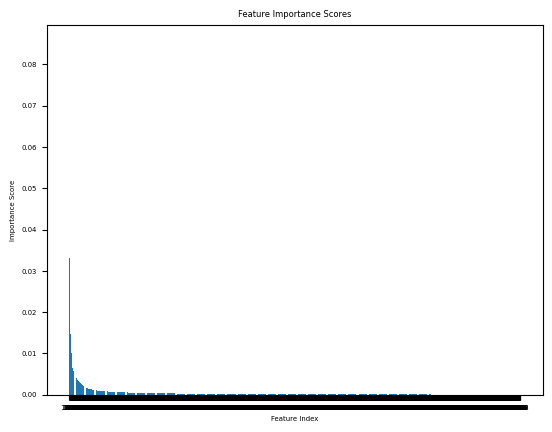

Sorted column names: ['FP1011', 'D32', 'D37', 'D26', 'D11', 'FP1242', 'D25', 'FP1666', 'FP0916', 'FP0796', 'D38', 'D41', 'FP0451', 'FP0810', 'FP1555', 'D27', 'D42', 'FP0939', 'FP1879', 'D40', 'D29', 'D30', 'FP0293', 'D36', 'FP0896', 'D34', 'D35', 'FP0866', 'D31', 'D33', 'D22', 'FP1644', 'D39', 'D03', 'D09', 'D04', 'FP0843', 'D28', 'D01', 'D00', 'FP0321', 'D24', 'FP0244', 'D08', 'FP1411', 'D05', 'FP1925', 'FP0970', 'FP1798', 'D06', 'FP0518', 'FP1624', 'FP1456', 'FP1878', 'FP0310', 'FP1044', 'FP0173', 'D02', 'FP1397', 'FP0305', 'FP1104', 'FP1891', 'FP0652', 'FP0319', 'FP1484', 'FP0401', 'FP0503', 'FP1124', 'D23_0.0', 'FP0273', 'FP1118', 'FP1133', 'FP0938', 'FP0776', 'D10', 'FP0053', 'FP1532', 'FP1561', 'FP0881', 'FP0260', 'FP2026', 'FP1955', 'FP0848', 'FP1825', 'D15_1.0', 'FP0632', 'FP1735', 'FP0203', 'FP0726', 'FP1063', 'FP1205', 'FP0836', 'FP1020', 'FP0977', 'D07', 'FP2033', 'FP0998', 'FP1354', 'FP1096', 'D23_1.0', 'FP0334', 'FP1814', 'FP0636', 'FP0343', 'FP1606', 'FP0747', 'FP1949', '

In [38]:
#All the data
indices = elbow_point (df_X_train_scaled,df_y_train)

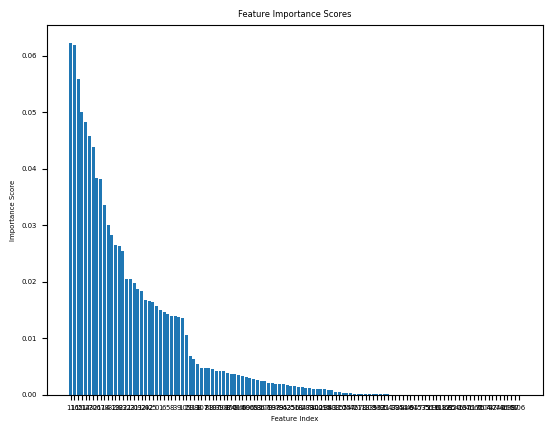

Sorted column names: ['D11', 'D27', 'D26', 'D32', 'D25', 'D38', 'D41', 'D37', 'D28', 'D29', 'D04', 'D42', 'D40', 'D39', 'D34', 'D33', 'D24', 'D31', 'D30', 'D22', 'D35', 'D18_0.0', 'D36', 'D00', 'D01', 'D06', 'D05', 'D08', 'D03', 'D09', 'D10', 'D02', 'D14_2.0', 'D23_0.0', 'D17_1.0', 'D20_0.0', 'D07', 'D16_3.0', 'D16_2.0', 'D18_1.0', 'D16_1.0', 'D20_1.0', 'D17_0.0', 'D19_1.0', 'D13_2.0', 'D23_1.0', 'D15_1.0', 'D13_3.0', 'D17_3.0', 'D15_0.0', 'D14_1.0', 'D12_4.0', 'D19_2.0', 'D15_2.0', 'D19_0.0', 'D12_5.0', 'D17_2.0', 'D18_2.0', 'D13_5.0', 'D12_3.0', 'D13_4.0', 'D14_3.0', 'D16_4.0', 'D13_1.0', 'D16_0.0', 'D12_2.0', 'D19_3.0', 'D21_0.0', 'D23_2.0', 'D12_6.0', 'D12_8.0', 'D12_1.0', 'D21_2.0', 'D14_0.0', 'D13_8.0', 'D13_0.0', 'D12_10.0', 'D14_4.0', 'D15_3.0', 'D16_5.0', 'D19_4.0', 'D12_7.0', 'D13_6.0', 'D14_5.0', 'D18_3.0', 'D21_4.0', 'D12_11.0', 'D15_4.0', 'D16_6.0', 'D13_7.0', 'D23_3.0', 'D12_14.0', 'D17_4.0', 'D12_13.0', 'D15_5.0', 'D15_7.0', 'D13_9.0', 'D23_8.0', 'D18_4.0', 'D23_6.0', 'D

In [39]:
#D columns
indices = elbow_point (df_X_train_D_scaled,df_y_train)

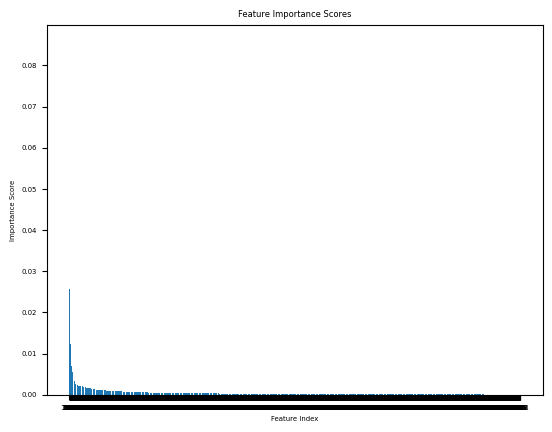

Sorted column names: ['FP1011', 'FP1666', 'FP0518', 'FP1242', 'FP0939', 'FP0810', 'FP0916', 'FP0843', 'FP1555', 'FP1879', 'FP0938', 'FP0310', 'FP1096', 'FP0122', 'FP0293', 'FP0866', 'FP0896', 'FP0636', 'FP1732', 'FP1484', 'FP0503', 'FP0053', 'FP1020', 'FP0970', 'FP1044', 'FP0881', 'FP0111', 'FP0173', 'FP1532', 'FP2026', 'FP1171', 'FP0508', 'FP0848', 'FP0977', 'FP1919', 'FP0652', 'FP0836', 'FP0273', 'FP1873', 'FP1063', 'FP0470', 'FP1176', 'FP1085', 'FP1223', 'FP1118', 'FP0399', 'FP1205', 'FP1104', 'FP0884', 'FP1874', 'FP1045', 'FP1124', 'FP1133', 'FP0632', 'FP1574', 'FP1411', 'FP1497', 'FP1735', 'FP1624', 'FP0451', 'FP1334', 'FP1456', 'FP1485', 'FP0772', 'FP0203', 'FP0412', 'FP0401', 'FP1598', 'FP0747', 'FP0260', 'FP0674', 'FP1823', 'FP0776', 'FP2079', 'FP1236', 'FP1561', 'FP0060', 'FP0828', 'FP1814', 'FP1049', 'FP0235', 'FP1955', 'FP2033', 'FP0031', 'FP0343', 'FP2037', 'FP1609', 'FP0143', 'FP0824', 'FP0603', 'FP0129', 'FP1089', 'FP0637', 'FP1783', 'FP0922', 'FP0850', 'FP1940', 'FP1734'

In [40]:
#FP columns
indices = elbow_point (df_X_train_FP,df_y_train)

Observations:
* A sudden drop in the graph, indicates that the optimal number of features to select is before the descent.

### Testing Regression models

#### Auxiliar functions

In [42]:
# Test feature_selection; scalers and models (w/ cross validate) a list of models (regression, classification) and present the results (sorted)
# Return results updated
def test_models2 (name_train, feat_sel, k_features, n_comp, scalers, models, scoring, X_train, y_train, X_test, cv_k, results, model_type, verbose):
   
    for name_aproach_feat_params, lamda_func, function_feat_w_params, sec_fs, function_fs2 in feat_sel:

        # Select function to call for Features Selection
        if lamda_func:
            #Call the lambda function to get the actual return value
            X_train_fs, X_test_fs = function_feat_w_params()
        else:
            X_train_fs, X_test_fs = function_feat_w_params(X_train, y_train, X_test, k_features, n_comp, verbose)

        if  sec_fs: #apply second function for feature selection after pca
            X_train_fs, X_test_fs = function_fs2(X_train_fs, y_train, X_test_fs, k_features, n_comp, verbose)
            

        # Scaler (just features selected): #List to have the possibility to change scaler… HUMM REMOVE SCALING;;;;;;
        #for name_scaler, scaler  in scalers:
        #    X_train,X_test = scaling (scaler, X_train,X_test , verbose)
        #    # Check for missing values
        #    n_missing_values = check_missing_values (X_train, verbose)
        name_scaler= "MinMax" #scaler previus done
        
        for name, estimator in models: #Models
            est = estimator
            scores = cross_validate(est, X_train_fs, y_train, cv=cv_k, scoring=scoring) 
            results = save_scores (name_train,name_aproach_feat_params,name_scaler,est, scores, name, results,model_type, verbose) #name_scaler
        results = sort_results (results,model_type)
        display_scores (results,model_type)
        
    return results

# Through Initial Data, not changed by EDA (X_train_df, y_train_df, X_ivs_df)
USE_LAMBDA = True
NO_USE_LAMBDA = False
SECOND_FS = True
NO_SECOND_FS = False

# Functions to feature_selection and scalers
# select_features = [('select_features', select_features)]

#lambda: not to interpret the function now, just when calling
feat_sel = [
    ('pca__rf_fs', NO_USE_LAMBDA, pca_red_d, SECOND_FS, rf_feature_selection) #OK PCA and random forest feature selection
    ,
    ('pca__sel_f', NO_USE_LAMBDA, pca_red_d, SECOND_FS, select_features) #OK PCA and feature selection
    ,
    ('rf_fs', NO_USE_LAMBDA, rf_feature_selection, NO_SECOND_FS,NO_SECOND_FS) #OK random forest feature selection
    ,    
    ('sel_f', NO_USE_LAMBDA, select_features,NO_SECOND_FS,NO_SECOND_FS) #OK select features
    ,
    ('pca', NO_USE_LAMBDA, pca_red_d,NO_SECOND_FS,NO_SECOND_FS) # PCA
#    ,
#    ('step_fs_back_DTree_md_10',USE_LAMBDA,  lambda: stepwise_feature_selection (X_train, y_train, DecisionTreeRegressor(max_depth = 10), k_features, 'backward', 'True'),NO_SECOND_FS,NO_SECOND_FS) #verbose

    #('sel_features', lambda: select_features(X_train, y_train, X_ivs_df, k_features, 'True')) #X_ivs_df X_test no defined? verbose no defined?
    #('select_features', lambda: select_features(X_train, y_train, X_ivs_df, k_features, 'True')) #verbose is not defined; True, list is not callable
    #('select_features', lambda: select_features(X_train, y_train, X_test, k_features, verbose)) #verbose is not defined; True, list is not callable
    # #X_test not defined? THINK <---------change X_test X_train #verbose not defined? ´True' THINK <---------
    # 2 Slow ('step_fs_back_DTree_md_10',True,  lambda: stepwise_feature_selection (X_train, y_train, DecisionTreeRegressor(max_depth = 10), k_features, 'backward', 'True')) #verbose
    #('step_fs_back_DTree_md_10',True,  lambda: stepwise_feature_selection (X_train, y_train, DecisionTreeRegressor(max_depth = 10), k_features, 'backward', verbose)) #verbose

    #, #verbose not defined? ´True' THINK <---------
    
    #stepwise_feature_selection DecisionTreeRegressor (max_depth = 5) backward
    #stepwise_feature_selection DecisionTreeRegressor (max_depth = 3) backward
    #stepwise_feature_selection DecisionTreeRegressor (max_depth = 10) forward
    #stepwise_feature_selection DecisionTreeRegressor (max_depth = 5) forward
    #stepwise_feature_selection DecisionTreeRegressor (max_depth = 3) forward
    
    #stepwise_feature_selection RandomForestRegressor backward
    #stepwise_feature_selection RandomForestRegressor forward
]

    

scalers = [('mMScaler', MinMaxScaler())] #AT NOT USED::::


## Evaluation 
We evaluate the model’s performance and determine whether it meets the business objectives.
- Evaluation using cross-validate
- Fine-tune Models  
- Model Evaluation on Test Set 

### Evaluation using cross-validate

CV to choose 2 to 3 models per type of goal (Regression), with best scores:

Regression scores:
- R-squared (R2): R-squared is a statistical measure that represents the proportion of the variance for a dependent variable that’s explained by an independent variable or variables in a regression model. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.
It measures how well the model fits the data by comparing it to a baseline model that always predicts the mean of the target variable. The higher the R2 score, the better the model’s performance

- Mean Absolute Error (MAE): MAE is a measure of errors between paired observations expressing the same phenomenon. 
It is calculated as the average absolute difference between the actual and predicted values.

- Mean Squared Error (MSE): MSE is a measure of errors between paired observations expressing the same phenomenon. 
It is calculated as the average squared difference between the actual and predicted values.

- Median Absolute Error: Median Absolute Error is a robust measure of errors between paired observations expressing 
the same phenomenon. It is calculated as the median absolute difference between the actual and predicted values.

-  Pearson correlation coefficient is a metric that is used to evaluate the performance of a model. It measures the linear relationship between predicted and actual values. The value of Pearson correlation coefficient ranges from -1 to 1. A value of 1 indicates a perfect positive linear relationship, 0 indicates no linear relationship, and -1 indicates a perfect negative linear relationship - PUT

All the Data



--------------------------Results for Regression Models Performance--------------------------
SVR                       | r2     0.6426 | MAE     0.1238 | MSE     0.0272 | median abs error 0.0956
                          | name_train All_PC400_K75 | Feat&Params pca__rf_fs | Scaler MinMax
RdForest_R                | r2     0.5683 | MAE     0.1392 | MSE     0.0329 | median abs error 0.1118
                          | name_train All_PC400_K75 | Feat&Params pca__rf_fs | Scaler MinMax
XGBRegressor              | r2     0.5465 | MAE     0.1414 | MSE     0.0345 | median abs error 0.1108
                          | name_train All_PC400_K75 | Feat&Params pca__rf_fs | Scaler MinMax
GrBoost_R_T               | r2     0.4715 | MAE     0.1589 | MSE     0.0402 | median abs error 0.1349
                          | name_train All_PC400_K75 | Feat&Params pca__rf_fs | Scaler MinMax
LRegr_T                   | r2     0.3758 | MAE     0.1740 | MSE     0.0475 | median abs error 0.1487
    

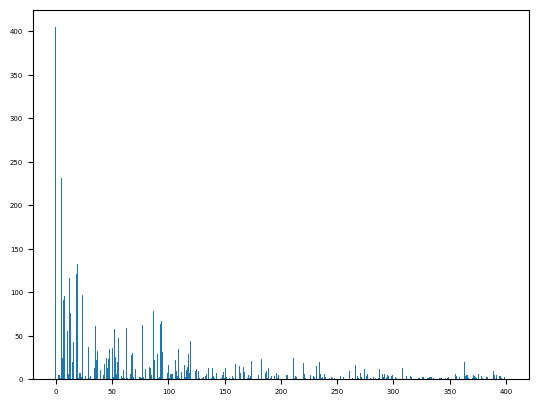


--------------------------Results for Regression Models Performance--------------------------
SVR                       | r2     0.6498 | MAE     0.1230 | MSE     0.0267 | median abs error 0.0950
                          | name_train All_PC400_K75 | Feat&Params pca__sel_f | Scaler MinMax
SVR                       | r2     0.6426 | MAE     0.1238 | MSE     0.0272 | median abs error 0.0956
                          | name_train All_PC400_K75 | Feat&Params pca__rf_fs | Scaler MinMax
RdForest_R                | r2     0.5683 | MAE     0.1392 | MSE     0.0329 | median abs error 0.1118
                          | name_train All_PC400_K75 | Feat&Params pca__rf_fs | Scaler MinMax
RdForest_R                | r2     0.5611 | MAE     0.1409 | MSE     0.0334 | median abs error 0.1132
                          | name_train All_PC400_K75 | Feat&Params pca__sel_f | Scaler MinMax
XGBRegressor              | r2     0.5465 | MAE     0.1414 | MSE     0.0345 | median abs error 0.1108
                   

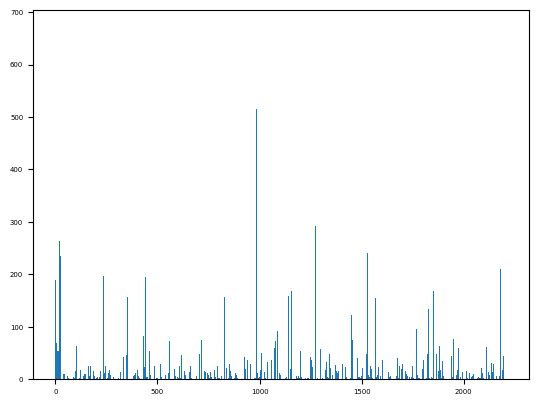


--------------------------Results for Regression Models Performance--------------------------
SVR                       | r2     0.6498 | MAE     0.1230 | MSE     0.0267 | median abs error 0.0950
                          | name_train All_PC400_K75 | Feat&Params pca__sel_f | Scaler MinMax
SVR                       | r2     0.6426 | MAE     0.1238 | MSE     0.0272 | median abs error 0.0956
                          | name_train All_PC400_K75 | Feat&Params pca__rf_fs | Scaler MinMax
RdForest_R                | r2     0.5737 | MAE     0.1362 | MSE     0.0325 | median abs error 0.1044
                          | name_train All_PC400_K75 | Feat&Params rf_fs | Scaler MinMax
RdForest_R                | r2     0.5683 | MAE     0.1392 | MSE     0.0329 | median abs error 0.1118
                          | name_train All_PC400_K75 | Feat&Params pca__rf_fs | Scaler MinMax
RdForest_R                | r2     0.5611 | MAE     0.1409 | MSE     0.0334 | median abs error 0.1132
                        

In [45]:
#Constants to identify type of model/challenge
REGRESSION = 1
CLASSIFICATION = 2

# Number of models, by type (regressions and classification), that will be fine tuned
N_FINETUNE_MODELS_TYPE = 3

# Number of final reports to print from results, with test dataset
N_FINAL_REPORT = 1

# Save the model scores and present intermediate results (w/ verbose)
# Return the list with the saved scores 
def save_scores(name_train, name_aproach_feat_params,name_scaler, best_estimator, scores, name, results,model_type, verbose):
    if verbose:
        if model_type == CLASSIFICATION:
            print(f"\n {name}")
            print("Precision scores:", scores['test_precision'])
            print("Recall scores:", scores['test_recall'])
            print("f1 scores:", scores['test_f1'])

            print("Scores:", scores)

            print("Mean precision:", np.mean(scores['test_precision']))
            print("Mean recall:", np.mean(scores['test_recall']))
            print("Mean f1:", np.mean(scores['test_f1']))

            print("Standard deviation precision:", np.std(scores['test_precision']))
            print("Standard deviation recall:", np.std(scores['test_recall']))
            print("Standard deviation f1:", np.std(scores['test_f1']))
        elif model_type == REGRESSION:
            print (f"Regression in dataset name_train {name_train}")
            print (f"Regression in save score model_type {model_type}")
            print (f"name_aproach_feat_params {name_aproach_feat_params}")
            print (f"name_scaler {name_scaler}")

            print("R-squared (r2) scores:", scores['test_r2'])
            print("Mean Absolute Error (MAE) scores:", - scores['test_neg_mean_absolute_error'])
            print("Mean Squared Error (MSE) scores:", - scores['test_neg_mean_squared_error'])
            print("Median Absolute Error scores:", - scores['test_neg_median_absolute_error'])
    
            print("Mean R-squared (r2) score:", scores['test_r2'].mean())
            print("Mean Mean Absolute (MAE) Error score:", - scores['test_neg_mean_absolute_error'].mean())
            print("Mean Mean Squared (MSE) Error score:", - scores['test_neg_mean_squared_error'].mean())
            print("Mean Median Absolute Error score:", - scores['test_neg_median_absolute_error'].mean())
    
            print("Standard deviation of R-squared (r2) score:", scores['test_r2'].std())
            print("Standard deviation of Mean Absolute (MAE) Error score:", scores['test_neg_mean_absolute_error'].std())
            print("Standard deviation of Mean Squared (MSE) Error score:", scores['test_neg_mean_squared_error'].std())        
            print("Standard deviation of Median Absolute Error score:", scores['test_neg_median_absolute_error'].std())
                
    # after verbose save results
    
    if model_type == CLASSIFICATION:
        results.append((name,
                    best_estimator,
                    np.mean(scores['test_precision']), # mean because is test_precision for all the k cv
                    np.mean(scores['test_recall']),
                    np.mean(scores['test_f1']),
                    np.std(scores['test_precision']),
                    np.std(scores['test_recall']),
                    np.std(scores['test_f1']),
                    ))
    elif model_type == REGRESSION:
        # print (f"Regression in save score 2 model_type {model_type}")
        results.append((name,
                    best_estimator,
                    name_aproach_feat_params,
                    name_scaler,
                    scores['test_r2'].mean(),
                    - scores['test_neg_mean_absolute_error'].mean(),   #- positive  scores
                    - scores['test_neg_mean_squared_error'].mean(),    #- positive  scores
                    - scores['test_neg_median_absolute_error'].mean(), #- positive  scores
                    scores['test_r2'].std(),
                    scores['test_neg_mean_absolute_error'].std(),
                    scores['test_neg_mean_squared_error'].std(),
                    scores['test_neg_median_absolute_error'].std(),
                    name_train,
                    ))
    return results


# Sort results and return the sorted result
def sort_results (results,model_type):

    # sorted() is a built-in Python function that sorts an iterable object (e.g., list, tuple, etc.) in 
    # ascending order by default. It can also sort in descending order if the reverse=True argument is passed.
    # In this case, sorted() is used to sort the results list of tuples by the fourth element of each tuple (i.e., F1 score)
    # in descending order. The key argument is set to a lambda function that returns the second element of each tuple. 
    # The reverse=True argument is also passed to sort in descending order.
    
    if model_type == CLASSIFICATION:

        # CLASSIFICATION: Sort models by Highest F1 scores (decreasing)
        results_sorted = sorted(results, key=lambda x: x[4], reverse=True)

    elif model_type == REGRESSION:
        
        # REGRESSION: Sort models by lowest MSE scores (increasing)
        results_sorted = sorted(results, key=lambda x: x[6], reverse=False)
        
    return results_sorted

# Execute final report for N_FINAL_REPORT models
def display_final_report (X_train, y_train, X_test, y_test, results,model_type):
    for n_model in range (N_FINAL_REPORT): # apply only to the first N_FINAL_REPORT 
        best_estimator = results[n_model][1] # best estimator model to obtain classification report
        best_estimator.fit(X_train, y_train)            
        y_pred = best_estimator.predict(X_test)
        print (f"\n best_estimator for X_test, {best_estimator}")
        if model_type == CLASSIFICATION:
            print(classification_report(y_test, y_pred))
            print("\n Matthews correlation coefficient (MCC) score:", matthews_corrcoef(y_test, y_pred))
            #  in cv: make_scorer to create a scorer object for MCC and pass it to the scoring parameter
        elif model_type == REGRESSION:
            final_r2 = r2_score(y_test, y_pred)            
            final_mae = mean_absolute_error(y_test, y_pred)
            final_mse = mean_squared_error(y_test, y_pred)
            #final_rmse = np.sqrt(final_mse)
            neg_median_absolute_error = median_absolute_error(y_test, y_pred)
            print(f" r2: {final_r2:.4f} mae: {final_mae:.4f} mse: {final_mse:.4f} neg_median_absolute_error: {neg_median_absolute_error:.4f}")
            pearson = np.corrcoef(y_test, y_pred)[0][1]
            print("Pearson correlation coefficient score:", pearson)

# Display the model final scores. Receives the ordered results to present
def display_scores (results,model_type):        
    
    noshow = ""
    if model_type == CLASSIFICATION:

        print (f"\n--------------------------Results for Classification Models Performance--------------------------")
        for res in results:
            name = res[0]
            precision = res[2] # [1] is best_estimator
            recall = res[3]
            f1 = res[4]
            std_precision = res[5]
            std_recall = res[6]
            std_f1 = res[7]

            print(f"{name.ljust(25)} | precision     {precision:.4f} | recall     {recall:.4f} | f1     {f1:.4f}")
            print(f"{noshow.ljust(25)} | std_precision {std_precision:.4f} | std_recall {std_recall:.4f} | std_f1 {std_f1:.4f}")
    
    elif model_type == REGRESSION:
        
        print (f"\n--------------------------Results for Regression Models Performance--------------------------")
        for res in results:
            name = res[0]
            name_aproach_feat_params = res[2] # [1] is best_estimator
            name_scaler = res[3]
            r2 = res[4] # [1] is best_estimator
            MAE = res[5] 
            MSE = res[6] 
            median_absolute_error = res[7] 
            std_r2 = res[8]
            std_MAE = res[9]
            std_MSE = res[10]
            std_median_absolute_error = res[11]
            name_train = res[12]


            print(f"{name.ljust(25)} | r2     {r2:.4f} | MAE     {MAE:.4f} | MSE     {MSE:.4f} | median abs error {median_absolute_error:.4f}")
            #print(f"{noshow.ljust(25)} | std_r2 {std_r2:.4f} | std_MAE {std_MAE:.4f}  | std_MSE {std_MSE:.4f}  | std_median_absolute_error     {std_median_absolute_error:.4f}")
            # print(f"{noshow.ljust(25)} | Feat&Params {name_aproach_feat_params} | Scaler {name_scaler}  | std r2 {std_r2:.4f} | std MAE {std_MAE:.4f}  | std MSE {std_MSE:.4f}  | std median abs error {std_median_absolute_error:.4f}")
            print(f"{noshow.ljust(25)} | name_train {name_train} | Feat&Params {name_aproach_feat_params} | Scaler {name_scaler}")

        final_res = pd.DataFrame(results)
        final_res.columns = ["Estimator", "b_est", "FS_Approach", "Scaler", "r2", "MAE", "MSE", "m_abs_e","std r2","std MAE","std MSE", "std median abs error", "name_train"]
        final_res_formatted = final_res.copy()
        final_res_formatted[["r2", "MAE", "MSE", "m_abs_e","std r2","std MAE","std MSE", "std median abs error"]] = final_res[["r2", "MAE", "MSE", "m_abs_e","std r2","std MAE","std MSE", "std median abs error"]].applymap(lambda x: f"{x:.4f}")
        final_res_formatted[["Estimator", "b_est", "FS_Approach", "Scaler","name_train"]] = final_res[["Estimator", "b_est", "FS_Approach", "Scaler","name_train"]]
        #print(final_res_formatted[["name_train", "Estimator", "FS_Approach", "Scaler", "r2", "MAE", "MSE"]]) # "m_abs_e"
        print_full(final_res_formatted[["name_train", "Estimator", "FS_Approach", "Scaler", "r2", "MAE", "MSE"]],500) # "m_abs_e"

        


regression_models = [
    ('RdForest_R', RandomForestRegressor())
    ,                 
    ('XGBRegressor',  XGBRegressor()),     
    ('GrBoost_R_T',  GradientBoostingRegressor()), 
#    ('AdaBoostR',  AdaBoostRegressor(base_estimator=dt)), #AT
    ('SVR',  SVR()),
    ('LModel_T',  DecisionTreeRegressor()),                    
    ('DTree_R',  DecisionTreeRegressor()),              
    ('LRegr_T', LinearRegression())
]

#Dictionary instead of list in order to test if regression name in dic...list is adequate  4 for 
regression_models_dic = {
    'RdForest_R': RandomForestRegressor()
    ,                 
    'XGBRegressor':  XGBRegressor(),     
    'GrBoost_R_T':  GradientBoostingRegressor(),    
#    'AdaBoostR',  AdaBoostRegressor(base_estimator=dt)), #AT
    'SVR':  SVR(),
    'LModel_T':  DecisionTreeRegressor(),                    
    'DTree_R':  DecisionTreeRegressor(),              
    'LRegr_T': LinearRegression()
}


regression_scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error']


# Initialize empty list to store results for each model
results_regression = []
VERBOSE = True
NO_VERBOSE = False

# param k_features based on elbow
k_features_75 = 75 # Based on all elbow
k_features_31 = 31 # Based on the elbow D
k_features_50 = 50 # Based on the elbow FP

# param PCA
n_comp_100 = 101 #PC100 - Variance explained:  0.0018 - Total Variance:  0.5567
n_comp_200 = 201 #PC200 - Variance explained:  0.0009 - Total Variance:  0.6842
n_comp_300 = 301 #PC300 - Variance explained:  0.0006 - Total Variance:  0.7567
n_comp_400 = 401 #PC400 - Variance explained:  0.0004 - Total Variance:  0.8059

n_comp_35 = 35 # PCA =34 is 35: scaled,  categorize Var ~ 90,12% PC34 99,07%


# 1) All the Data:
print ("All the Data\n\n")
name_train = "All_PC400_K75"
results_regression = test_models2 (name_train, feat_sel, k_features_75,n_comp_400, scalers, regression_models, regression_scoring,df_X_train_scaled, df_y_train,df_X_ivs_scaled, 5, results_regression, REGRESSION, NO_VERBOSE)
         

In [ ]:
# 2) D columns
print ("X train with the D columns only\n\n")
name_train = "D_PC35_K31"
results_regression = test_models2 (name_train,feat_sel, k_features_31, n_comp_35, scalers, regression_models, regression_scoring, df_X_train_D_scaled, df_y_train, df_X_ivs_D_scaled, 5, results_regression, REGRESSION, NO_VERBOSE) 

In [ ]:
# 3) FP columns  
print ("X train with the FP columns only\n\n")
name_train = "FP_PC400_K75"
results_regression = test_models2 (name_train, feat_sel, k_features_75,n_comp_400, scalers, regression_models, regression_scoring, df_X_train_FP, df_y_train, df_X_ivs_FP, 5, results_regression, REGRESSION, NO_VERBOSE) 

### Model Tuning

In [47]:
# Apply Feature Selection to the best...

name_train = "All_PC400_K75" # 0,0254?
k_features=75
n_comp=400
name_scaler = "MinMax"
name_aproach_feat_params = 'pca'
function_feat_w_params= pca_red_d
verbose = NO_VERBOSE


df_X_train_scaled_fs, df_X_ivs_scaled_fs = function_feat_w_params (df_X_train_scaled, df_y_train, df_X_ivs_scaled, k_features, n_comp, VERBOSE)

PC0 - Variance explained:  0.0384 - Total Variance:  0.0384
PC1 - Variance explained:  0.0297 - Total Variance:  0.0681
PC2 - Variance explained:  0.0249 - Total Variance:  0.0930
PC3 - Variance explained:  0.0191 - Total Variance:  0.1122
PC4 - Variance explained:  0.0174 - Total Variance:  0.1295
PC5 - Variance explained:  0.0156 - Total Variance:  0.1451
PC6 - Variance explained:  0.0146 - Total Variance:  0.1597
PC7 - Variance explained:  0.0135 - Total Variance:  0.1732
PC8 - Variance explained:  0.0130 - Total Variance:  0.1862
PC9 - Variance explained:  0.0114 - Total Variance:  0.1976
PC10 - Variance explained:  0.0105 - Total Variance:  0.2081
PC11 - Variance explained:  0.0101 - Total Variance:  0.2182
PC12 - Variance explained:  0.0098 - Total Variance:  0.2280
PC13 - Variance explained:  0.0093 - Total Variance:  0.2374
PC14 - Variance explained:  0.0089 - Total Variance:  0.2462
PC15 - Variance explained:  0.0083 - Total Variance:  0.2545
PC16 - Variance explained:  0.0080

In [48]:
# Grid Search
# Can lead to overfit models specially in high variance models
# SVR: A small value of C creates a wider margin, which may lead to more misclassifications 
# of the training data but better generalization to the test data. A large value of C creates a narrower margin, which may lead to fewer misclassifications of the training data but worse generalization to the test data.

# have result from FS 
df_X_train_scaled_fs_gs = df_X_train_scaled_fs.copy() 
df_X_ivs_scaled_fs_gs = df_X_ivs_scaled_fs.copy()   

name_model = 'SVR'
est = SVR()
est_param = {'C': [0.1, 0.5 ,1, 5,10]} #maintan kernel as linear
#est_param = {'C': [0.1, 0.5 ,1, 3, 5,10], 'kernel': ['linear', 'rbf']}

# regression_scoring
                 
results = []
verbose = NO_VERBOSE
cv_k = 5 # Cross Validate k-folds
               
grid_search = GridSearchCV(estimator=est, param_grid=est_param, cv=cv_k)
grid_search.fit(df_X_train_scaled_fs_gs, df_y_train) # cv in trainning dataset
        
# Print the best hyperparameters and the corresponding mean cross-validation score
print(f"\n best_estimator_  for {name_model}: {grid_search.best_estimator_}")
print(f"\n Best hyperparameters for {name_model}: {grid_search.best_params_}")
print(f"\n Cross-validation score for {name_model}: {grid_search.best_score_:.4f}")


 best_estimator_  for SVR: SVR(C=1)

 Best hyperparameters for SVR: {'C': 1}

 Cross-validation score for SVR: 0.6673


In [49]:
# Print the chart of the hyperparameters in order to analyse it to understand if we are choosing the write parameters values
# Rank of each hyperparameter combination based on the mean test score. 
# params: A dictionary of hyperparameters and their values for each combination of hyperparameters tested.

# rank_test_score: The rank of each hyperparameter combination based on the mean test score. 
# The hyperparameter combination with the lowest mean test score has a rank of 1.
# mean_test_score: The mean score over all cross-validation folds for each hyperparameter combination.
# std_test_score: The standard deviation of the test scores over all cross-validation folds for each hyperparameter combination.
# These variables can be used to analyze the performance of different hyperparameter combinations and select the best
# one forthe  model

res = pd.DataFrame(grid_search.cv_results_)
res = res.sort_values(by=["rank_test_score"])
res[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

# Observations: The best_estimator_  for SVR: SVR(C=1), having in consideration that lower C values creates a wider margin,
# which may lead to more misclassifications of the training data but better generalization to the test data. 
# And the mean_test_score betwwen c=1 (0,667192) and c=0,5 (0,666697) are almost equal we can apply c=0,5 (mse c=1 , c=0,5 )

,params,rank_test_score,mean_test_score,std_test_score
2,{'C': 1},1,0.667314,0.007036
1,{'C': 0.5},2,0.667117,0.006635
3,{'C': 5},3,0.658028,0.008694
4,{'C': 10},4,0.656662,0.008569
0,{'C': 0.1},5,0.611627,0.007933


In [50]:
## Final Results
scores = cross_validate(grid_search.best_estimator_, df_X_train_scaled_fs_gs, df_y_train, cv=cv_k, scoring=regression_scoring)

# Print the scores
print('R2 score:', scores['test_r2'].mean())
print('MAE (Mean absolute error):', -scores['test_neg_mean_absolute_error'].mean())
print('MSE (Mean squared error):', -scores['test_neg_mean_squared_error'].mean())
print('Median absolute error:', -scores['test_neg_median_absolute_error'].mean())

R2 score: 0.6673139846574216
MAE (Mean absolute error): 0.1209968206799
MSE (Mean squared error): 0.0253241430673334
Median absolute error: 0.09514643144695437


In [51]:
## Final Results

est = SVR(C=0.5)
scores = cross_validate(est, df_X_train_scaled_fs_gs, df_y_train, cv=cv_k, scoring=regression_scoring)

# Print the scores
print('R2 score:', scores['test_r2'].mean())
print('MAE (Mean absolute error):', -scores['test_neg_mean_absolute_error'].mean())
print('MSE (Mean squared error):', -scores['test_neg_mean_squared_error'].mean())
print('Median absolute error:', -scores['test_neg_median_absolute_error'].mean())

R2 score: 0.6671173790342515
MAE (Mean absolute error): 0.12091691510377958
MSE (Mean squared error): 0.02534411178805145
Median absolute error: 0.09456747783792038


### Predictions

In [52]:
est.fit(df_X_train_scaled, df_y_train)

# Predictions
predictions = est.predict(df_X_ivs_scaled)

# Export predictions to a .txt file
np.savetxt("33.txt", predictions)